# **타이타닉 생존자 분석**

- 타이타닉 호 침몰 사건의 사망자와 생존자를 여러 특성 분석을 통해 생존자를 예측

# 파일 업로드

In [ ]:
# colab에 파일 업로드하기 - test.csv
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
# colab에 파일 업로드하기 - train.csv
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


# 데이터 확인

In [ ]:
import pandas as pd # pandas를 사용하기 위해 선언, pd라는 별명 사용

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
# 훈련세트의 처음 5행 확인
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**특성**
- Survived : 타깃. 0은 생존X, 1은 생존
- Pclass : 승객 등급. 1,2,3 등석
- Name : 이름
- Sex : 성별
- Age : 나이
- SibSp : 함께 탑승한 형제, 배우자의 수
- Parch : 함께 탑승한 자녀, 부모의 수
- Ticket : 티켓 아이디
- Fare : 티켓 요금(파운드)
- Cabin : 객실 번호
- Embarked : 승객이 탑승한 곳(C : Cherbourg, Q : Queenstown, S : Southampton)

In [ ]:
# 데이터에 대한 간략한 설명과 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 특정 카테고리 분류

train_data["Pclass"].value_counts() # 승객 등급에 따라 분류

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train_data["Embarked"].value_counts() # 탑승 위치에 따라 분류

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# 숫자형 특성의 요약 정보
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- count : 정보별 샘플 수
- mean : 평균
- std : 표준편차
- min : 최솟값
- 백분위수 => 25%, 50%, 75%
- max : 최댓값


**matplotlib 라이브러리**
- 파이썬으로 데이터를 시각화하는 데 가장 많이 사용함
- 파이썬에서 2D 형태의 그래프, 이미지 등을 그릴 때 사용함

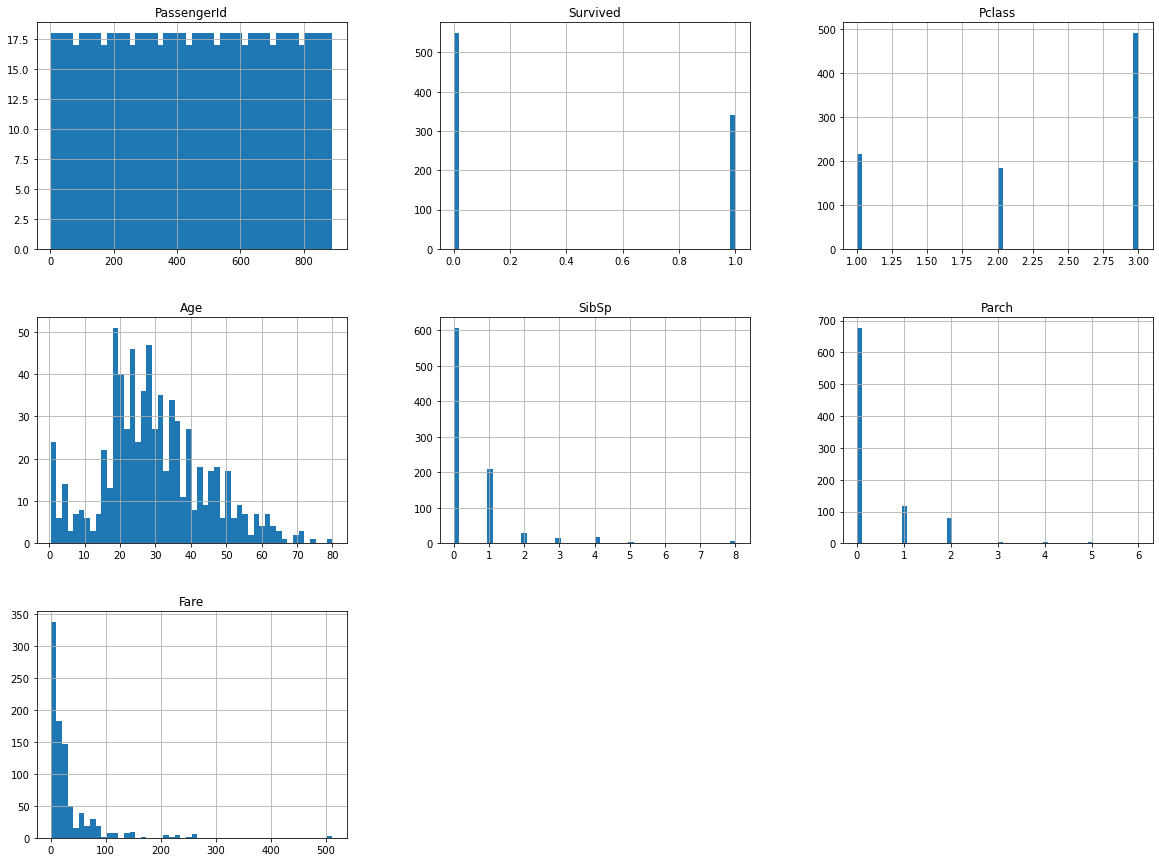

In [ ]:
import matplotlib.pyplot as plt # 여러 모듈 중 pyplot 모듈 사용. plt을 별명으로 사용
train_data.hist(bins=50, figsize = (20,15)) # 각 특성을 히스토그램으로 표현
plt.show()

In [ ]:
# 비어 있는 값 확인
train_data.isnull().sum() # train 데이터 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_data.isnull().sum() # test 데이터 확인

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# 데이터의 일부 컬럼 확인
train_data[['Survived', 'Sex']] # Survived와 Sex의 열 데이터 확인

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


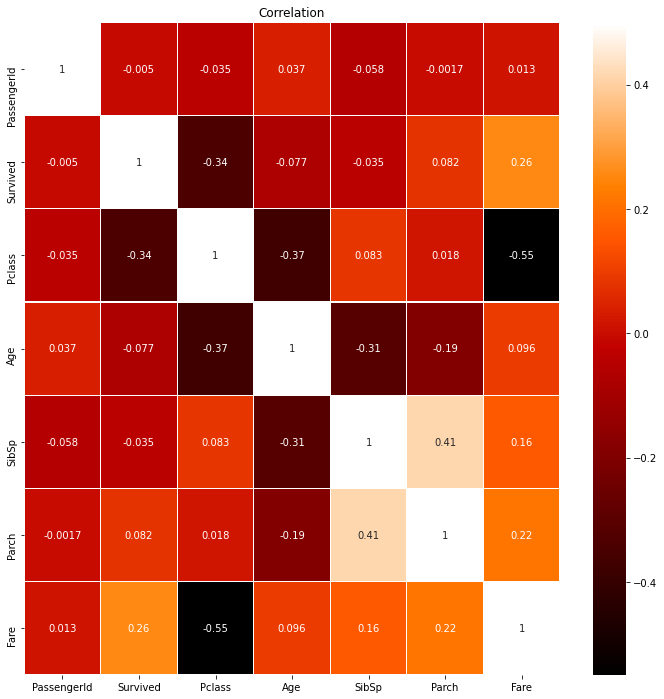

In [ ]:
# 각 정보끼리 상관관계 확인
import matplotlib.pyplot as plt
import seaborn as sns # seaborn : 좀 더 정교한 그래프를 그리게끔 도와주는 라이브러리

plt.figure(figsize = (12,12)) # 그래프의 크기 결정
# heatmap() 함수 : 두 항목씩 짝을 지은 뒤 각각 어떤 패턴으로 변화하는지를 관찰하는 함수
# 0 : 전혀 다른 패턴으로 변화
# 1 : 서로 비슷한 패턴으로 변화
# vmax : 색상의 밝기를 조절
# cmap : 미리 정해진 matplotlib 색상의 설정값을 불러옴
sns.heatmap(train_data.corr(), linewidths = 0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor = 'white', annot = True)

plt.title('Correlation') # 제목 설정
plt.show()

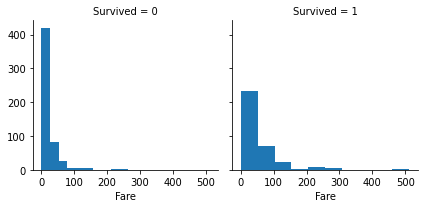

In [ ]:
# Fare과 Survived 항목만 따로 떼어 두 항목 간의 관계를 그래프로 표현
grid = sns.FacetGrid(train_data, col = 'Survived')
grid.map(plt.hist, 'Fare', bins = 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


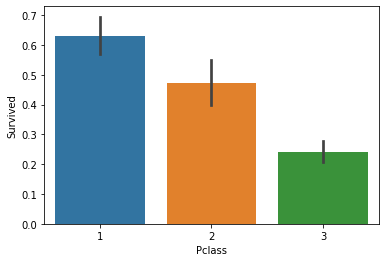

In [ ]:
# 승객 등급에 따른 생존 비율 막대 그래프
sns.barplot('Pclass', 'Survived', data = train_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


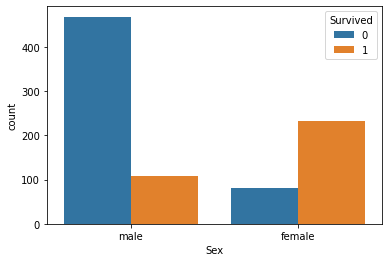

In [ ]:
# 성별에 따른 생존 비율 막대 그래프
sns.countplot('Sex', hue = 'Survived', data = train_data)
plt.show()

# 데이터 전처리 파이프

- 사이킷런은 덕 타이핑(객체의 속성이나 메서드가 객체의 유형을 결정하는 방식)을 지원
- fit_transform() 메서드는 TransformerMixin을 상속하면 자동으로 생성
- fit_transform() 메서드는 fit()와 transform()을 메서드 연결
- Mixin이 있으면 객체의 기능을 확장하려는 목적으로 만들어진 클래스를 나타냄
- BaseEstimator를 상속하면 하이퍼파라미터 튜닝에 필요한 get_params()와 set_params()를 추가로 얻음

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# 특정 열 선택 클래스 DataFrameSelector
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

**Pipeline**
- 데이터 사전 처리 및 분류의 모든 단계를 포함하는 단일 개체를 만들 수 있음
- train과 test 데이터 손실을 피할 수 있음.
- 교차 검증 및 기타 모델 선택 유형을 쉽게 만듦
- 재현성 증가

In [ ]:
# Pipeline 클래스 : 사이킷런에서 연속된 변환을 순서대로 처리할 수 있게 도와줌

# 숫자 특성을 처리하는 파이프라인
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [ ]:
# 파이프라인을 이용해 Age, SibSp, Parch, Fare 
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [ ]:
# 문자열로된 특성을 위해 별도의 클래스
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

**OneHotEncoder**
- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 받지 않음
- 그래서 모든 문자열 값들을 숫자 형으로 인코딩하는 전처리 작업 후에 머신러닝 모델에 학습해야 함
- OneHotEncoding : 하나의 값은 True(1), 나머지는 모두 False(0)으로 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 범주형 특성을 처리하는 파이프라인
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [ ]:
# 파이프라인을 이용해 Pclass, Sex, Embarked
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
# 숫자형, 범주형 파이프라인 합체

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [ ]:
# 파이프라인으로 Age, SibSp, Parch, Fare, Pclass, Sex, Embarked 확인
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [ ]:
# Survived 데이터만 y_train에 저장
y_train = train_data["Survived"]

# SVC 모델 훈련

**서포트 벡터 머신(SVM)**
- 마진(Margin) :  클래스를 구분하는 초평면(결정 경계)과 가장 가까운 훈련 샘플 사이의 거리
- 마진을 최대화 하는 분류 경계면을 찾는 기법
- 주어진 데이터가 어느 그룹에 속하는지 분류하는 분류 모델
- n개의 속성을 가진 데이터에는 최소 n+1개의 서포트 벡터가 존재한다.
- SVM에서는 결정 경계를 정의하는게 서포트 벡터이기 때문에 데이터 포인트 중에서 서포트 벡터만 잘 골라내면 다른 데이터는 확인 안해도 되기 때문에 빠르다.

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7329588014981274

- SVM 정확도 = 73.3%

# RandomForestClassifier 모델

**랜덤포레스트**
- 여러 개의 결정트리를 활용한 배깅 방식
- 배깅 : 동일한 알고리즘으로 여러 분류기를 만들어 최종 결정하는 알고리즘
- 장점 1. 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
- 장점 2. 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
- 장점 3. 다양한 분야에서 좋은 성능을 나타냄
- 단점 : 하이퍼 파라미터가 많아 튜닝을 위한 시간이 많이 소요됨

**파라미터**
- n_estimators : 결정트리의 개수를 지정, 무작정 트리 개수를 늘리면 성능이 좋아지는 것 대비 시간이 걸림

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126466916354558

- RandomForestClassifier 정확도 = 81.3%

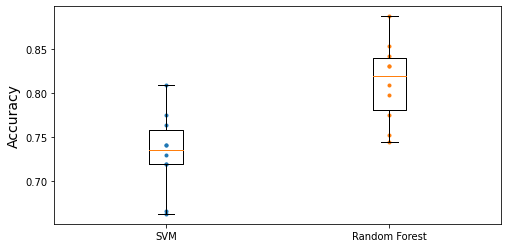

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

- SVM 보다 RandomForest 모델이 훨씬 1사분위에서 3사분위에 박스 안에 모여 있음.
- 이상치도 훨씬 적음.\
=> 성능이 높은 모델은 RandomForest 이다.